In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

### Load the file HR.csv into pandas dataframe

In [41]:
# Read the file
df = pd.read_csv('HR.csv')

In [42]:
# Display the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Check the number of missing values in each column
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
#Select only numerical values
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
            'Work_accident', 'left', 'promotion_last_5years']
df_nums = df[num_cols]
df_nums.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


###Calculate basic statistics for variables (mean, median, mode, min/max, standard deviation)

In [9]:
# Basic statistics of the dataset
df_nums.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Мode
df_nums.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


## Calculate and visualize the correlation matrix for quantitative variables. Identify the two most correlated and the two least correlated variables

In [11]:
# Create correlation matrices
correlation_matrix = df_nums.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

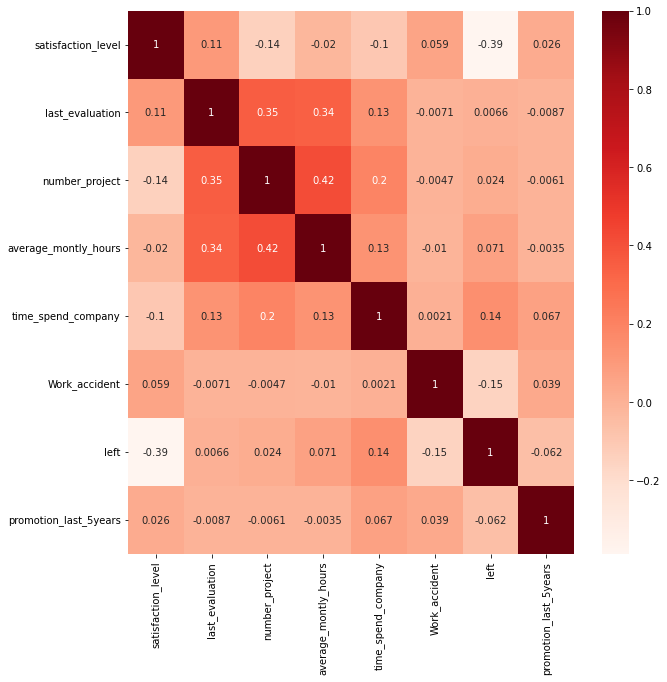

In [12]:
#Visualization
plt.subplots(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Reds')

<AxesSubplot:>

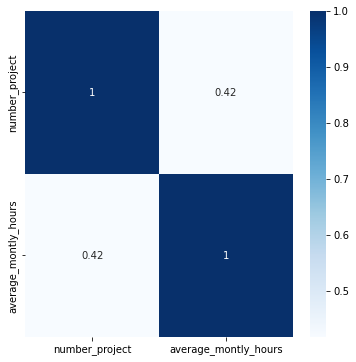

In [13]:
# The 2 most correlated variables
plt.subplots(figsize=(6, 6))
sns.heatmap(data=df_nums[['number_project', 'average_montly_hours']].corr(), annot=True, cmap='Blues')

<AxesSubplot:>

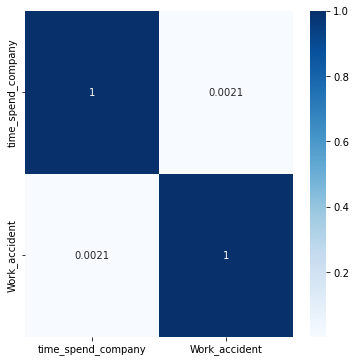

In [14]:
# The 2 variables with the lowest correlation
plt.subplots(figsize=(6, 6))
sns.heatmap(data=df_nums[['time_spend_company', 'Work_accident']].corr(), annot=True, cmap='Blues')

### Calculate how many employees work in each department

In [15]:
# Count the number of occurrences of values in the department column 
df['department'].value_counts().sort_values()

management      630
hr              739
accounting      767
RandD           787
marketing       858
product_mng     902
IT             1227
support        2229
technical      2720
sales          4140
Name: department, dtype: int64

<AxesSubplot:>

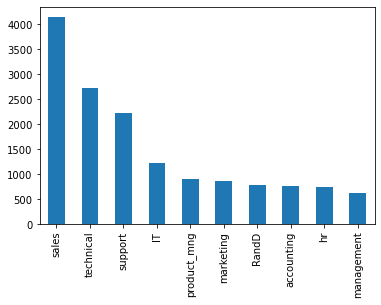

In [16]:
# On the graph
df['department'].value_counts().plot(kind='bar')

### 5. Показать распределение сотрудников по зарплатам

In [17]:
# Count the number of occurrences of values in the 'salary' column.
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:>

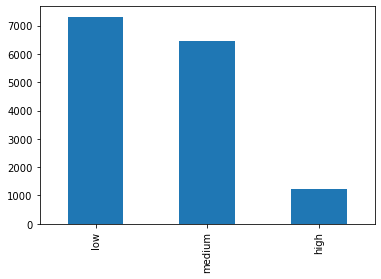

In [18]:
df['salary'].value_counts().plot(kind='bar')

### Show the distribution of employees by salary in each department separately.

In [19]:
# Count the number of occurrences of values in the 'department' and 'salary' columns (considering only one column at a time).

count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

Text(0, 0.5, 'Department')

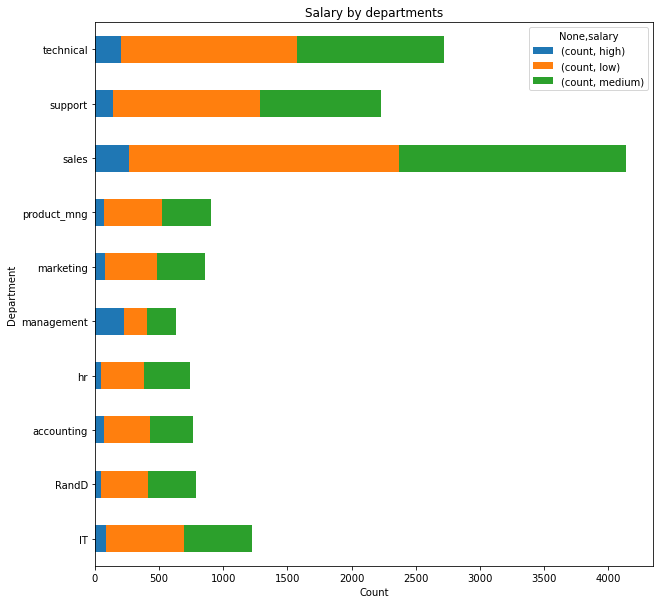

In [20]:
# Move one level of grouping from rows to columns and create a chart.
df1.unstack().plot(kind='barh', stacked=True, figsize=(10, 10))
plt.title("Salary by departments")
plt.xlabel("Count")
plt.ylabel("Department")

### Test the hypothesis that employees with higher salaries spend more time at work than employees with lower salaries.

In [21]:
# Extract the desired column into separate variables and filter by salary
df_high = df[df['salary'] == 'high']['average_montly_hours']
df_low = df[df['salary'] == 'low']['average_montly_hours']

In [22]:
# Hypothesis H0: Employees with high and low salaries work the same amount of time.
# Hypothesis H1: Employees with high salaries spend more time at work than employees with low salaries
# Calculate the t-statistic
t, p = stats.ttest_ind(a=df_high, b=df_low, equal_var=False)
t, p

(-0.7624331665385475, 0.4459045542257889)

In [23]:
#Usually, a significance level of 5%, or 0.05, is used
alpha = 0.05
if (p < alpha):
    print('Hypothesis H0 is rejected, and Hypothesis H1 is confirmed')
else:
    print('Hypothesis H0 is confirmed, and Hypothesis H1 is rejected')

Гипотеза H0 подтвержадется, а гипотеза H1 отвергается


In [24]:
# The same calculation of the t-statistic, but without using the stats library.
from math import sqrt

x1 = df_high.mean()
x2 = df_low.mean()
n1 = df_high.size
n2 = df_low.size
s1 = df_high.std()
s2 = df_low.std()

t = (x1 - x2) / sqrt(pow(s1, 2) / n1 + pow(s2, 2) / n2) 
t

-0.7624331665385473

###Calculate the following metrics for employees who have left and those who have not left (separately):

#### The proportion of employees who have received a promotion in the last 5 years

In [25]:
all_empl_count = df['promotion_last_5years'].count()

promotion_left_empl_count = df[df['left'] == 1]['promotion_last_5years'].sum()
promotion_empl_count = df[df['left'] == 0]['promotion_last_5years'].sum()

percentage_left = round(promotion_left_empl_count / all_empl_count * 100, 2)
percentage_not_left = round(promotion_empl_count / all_empl_count * 100, 2)

print(f'The proportion of employees who have left with a promotion in the last 5 years is {percentage_left}%')
print(f'The proportion of employees who have not left with a promotion in the last 5 years is {percentage_not_left}%')

Доля уволившихся сотрудников с повышением за последние 5 лет составляет 0.13%
Доля не уволившихся сотрудников с повышением за последние 5 лет составляет 2.0%


#### Average level of satisfaction

In [26]:
satisfaction_left = round(df[df['left'] == 1]['satisfaction_level'].mean(), 2)
satisfaction_not_left = round(df[df['left'] == 0]['satisfaction_level'].mean(), 2)

print(f'The average level of satisfaction for employees who have left is {satisfaction_left}%')
print(f'The average level of satisfaction for employees who have not left is {satisfaction_not_left}%')

Средняя степень удовлетворенности уволившихся сотрудников составляет 0.44%
Средняя степень удовлетворенности не уволившихся сотрудников составляет 0.67%


#### Average Number of Projects

In [27]:
projects_left = round(df[df['left'] == 1]['number_project'].mean(), 2)
projects_not_left = round(df[df['left'] == 0]['number_project'].mean(), 2)

print(f'The average number of projects for employees who have left is {projects_left}')
print(f'The average number of projects for employees who have not left is {projects_not_left}')

Среднее количество проектов у уволившихся сотрудников составляет 3.86%
Среднее количество проектов у не уволившихся сотрудников составляет 3.79%


###Split the data into training and test sets. Build an LDA model to predict whether an employee has left based on available factors (excluding department and salary). Evaluate the model's performance on the test set.

In [28]:
# Extract the dependent variable
target = 'left'

<AxesSubplot:>

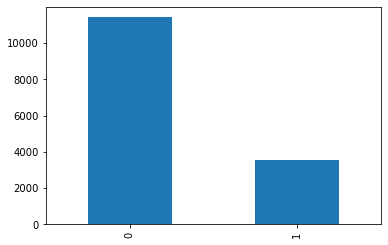

In [29]:
# View the distribution of values
df[target].value_counts().plot(kind='bar')

In [30]:
# The values of the dependent variable are imbalanced (0 is significantly more than 1), so we specify the stratify parameter
# The values of the dependent variable are imbalanced (0 is significantly more than 1), so we specify the stratify parameter
Y = df_nums.pop(target)
X = df_nums.copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
X_train.shape, X_test.shape

((11999, 7), (3000, 7))

<AxesSubplot:>

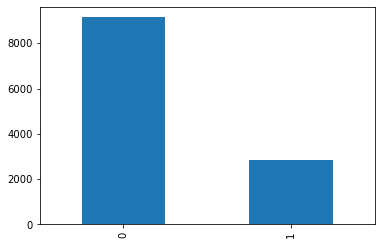

In [31]:
#Distribution of the dependent variable in the training set
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

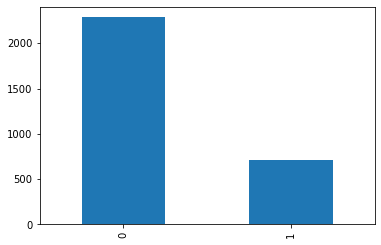

In [32]:
# Distribution of the dependent variable in the test set
y_test.value_counts().plot(kind='bar')

In [33]:
#Building the model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
# Making predictions
y_pred = model.predict(X_test)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [35]:
# Checking the accuracy of predictions
print(f"Model accuracy on the training set: {100 * metrics.accuracy_score(y_train, pred_train)}%")
print(f"Model accuracy on the test set: {100 * metrics.accuracy_score(y_test, pred_test)}%")

Accuracy модели на обучающей выборке 76.06467205600467
Accuracy модели на тестовой выборке 76.66666666666667


In [36]:
# Checking the accuracy of predictions with a different metric (more appropriate)
print(f"Balanced accuracy of the model on the training set: {100 * metrics.balanced_accuracy_score(y_train, pred_train)}%")
print(f"Balanced accuracy of the model on the test set: {100 * metrics.balanced_accuracy_score(y_test, pred_test)}%")

Balanced accuracy модели на обучающей выборке 58.616816752016774
Balanced accuracy модели на тестовой выборке 59.407647573465084


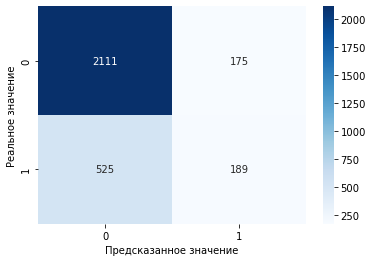

In [37]:
# Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)

sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
yticklabels=['Not Left', 'Left']
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [38]:
# Model accuracy improved after including additional non-numeric parameters
df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [39]:
#ebuilding the model with the new data
Y = df_new.pop(target)
X = df_new.copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
X_train.shape, X_test.shape

((11999, 18), (3000, 18))

In [40]:
#Building and evaluating the new model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(f"Model accuracy on the training set: {100 * metrics.accuracy_score(y_train, pred_train)}%")
print(f"Model accuracy on the test set: {100 * metrics.accuracy_score(y_test, pred_test)}%")

In [42]:
print(f"Balanced accuracy of the model on the training set: {100 * metrics.balanced_accuracy_score(y_train, pred_train)}%")
print(f"Balanced accuracy of the model on the test set: {100 * metrics.balanced_accuracy_score(y_test, pred_test)}%")

Balanced accuracy модели на обучающей выборке 62.17606439280616
Balanced accuracy модели на тестовой выборке 62.73388620540079


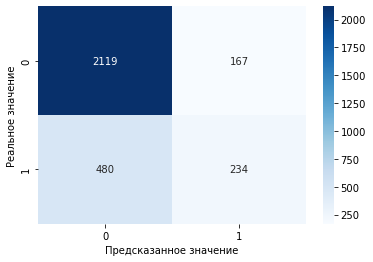

In [43]:
#Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)

sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
yticklabels=['Not Left', 'Left']
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [42]:
# Точность предсказаний увеличилась